In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def GeneratePathsMerton(NoOfPaths,NoOfSteps,S0, T,xiP,muJ,sigmaJ,r,sigma):
    # Create empty matrices for Poisson process and for compensated Poisson process
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    S = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])

    dt = T / float(NoOfSteps)
    X[:,0] = np.log(S0)
    S[:,0] = S0

    # Expectation E(e^J) for J~N(muJ,sigmaJ^2)
    EeJ = np.exp(muJ + 0.5*sigmaJ*sigmaJ)

    ZPois = np.random.poisson(xiP*dt,[NoOfPaths,NoOfSteps])
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])

    J = np.random.normal(muJ,sigmaJ,[NoOfPaths,NoOfSteps])

    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        # making sure that samples from normal have mean 0 and variance 1
        X[:,i+1]  = X[:,i] + (r - xiP*(EeJ-1) - 0.5*sigma*sigma)*dt +sigma*np.sqrt(dt)* Z[:,i]\
                    + J[:,i] * ZPois[:,i]
        time[i+1] = time[i] +dt

    S = np.exp(X)
    paths = {"time":time,"X":X,"S":S}
    return paths

In [19]:
def mainCalculation():
    NoOfPaths = 25
    NoOfSteps = 500
    T = 5
    xiP = 1
    muJ = 0
    sigmaJ = 0.7
    sigma = 0.2

    S0 =100
    r=0.05
    Paths = GeneratePathsMerton(NoOfPaths,NoOfSteps,S0, T,xiP,muJ,sigmaJ,r,sigma)
    timeGrid = Paths["time"]
    X = Paths["X"]
    S = Paths["S"]

    plt.figure(1)
    plt.plot(timeGrid, np.transpose(X))
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("X(t)")

    plt.figure(2)
    plt.plot(timeGrid, np.transpose(S))
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")

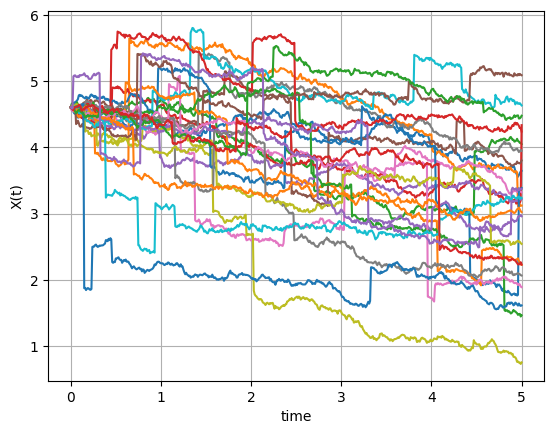

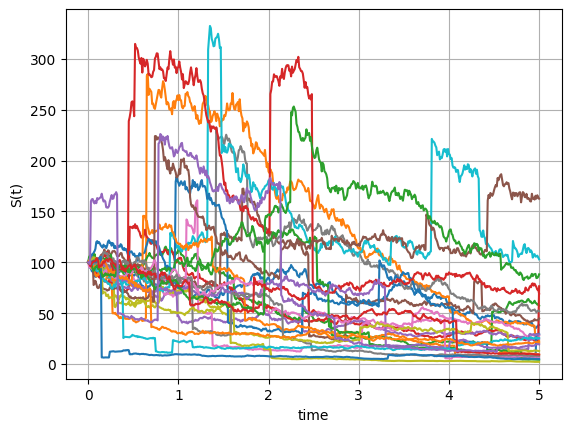

In [20]:
mainCalculation()